In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ajuste de curvas

In [101]:
x = np.linspace(0, 15)
f = 0.2 * np.sin(x) + 0.5* np.cos(x) + 0.1 * np.random.randn(50)

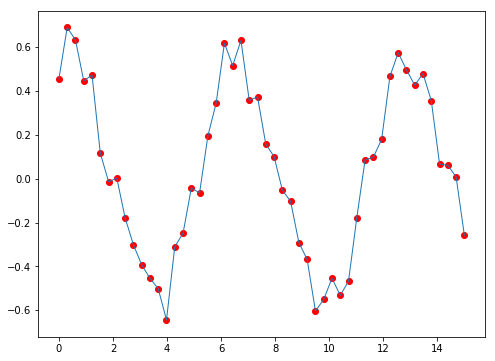

In [102]:
plt.figure(figsize = (8,6))
plt.scatter(x, f, c = "r")
plt.plot(x, f, lw = 1)
plt.show()

In [103]:
import scipy.optimize as opt

In [104]:
y = f

In [105]:
def obj(b, x, y, n):
    return np.sum((y - np.array([x**i for i in range(n + 1)]).T.dot(b))**2)

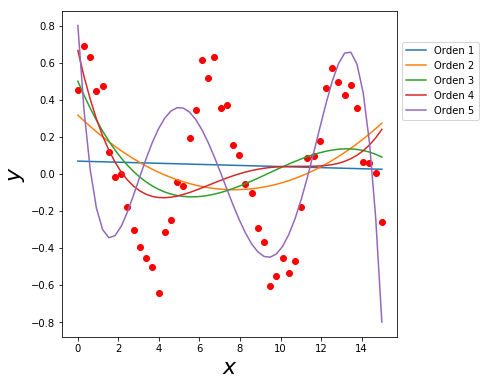

In [110]:
error = []
plt.figure(figsize = (6,6))
plt.scatter(x,y,  c = "r")
for i in range(1,6):
    b0 = np.random.random((i + 1,))
    res = opt.minimize(obj, b0, args=(x,y, i))
    yhat = np.array([x**j for j in range(i + 1)]).T.dot(res.x)
    error.append(np.sum(y - yhat)**2)
    plt.plot(x, yhat, label = "Orden %s" % i)
plt.legend(bbox_to_anchor=[1, .92])
plt.xlabel("$x$", fontsize = 22)
plt.ylabel("$y$", fontsize = 22)
plt.show()

In [107]:
errores = np.sort(np.array(error))

In [108]:
min3 = errores[:3]

In [109]:
errores

array([1.27715024e-13, 5.05398703e-12, 4.90374375e-10, 2.35801030e-06,
       4.46558931e-05])

In [45]:
def obj_ridge(b, x, y, n, l):
    return np.sum((y-np.array([x**i for i in range(n+1)]).T.dot(b))**2)+l*np.linalg.norm(b)**2

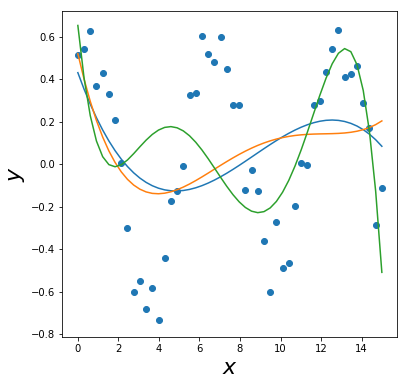

In [58]:
error = []
plt.figure(figsize = (6,6))
plt.scatter(x,y)
for i in range(3,6):
    b0 = np.random.random((i + 1,))
    res = opt.minimize(obj_ridge, b0, args=(x,y, i, .5))
    yhat = np.array([x**j for j in range(i + 1)]).T.dot(res.x)
    error.append(np.sum(y - yhat)**2)
    plt.plot(x, yhat, label = "Orden %s" % i)
#plt.legend(bbox_to_anchor=[1, .92])
plt.xlabel("$x$", fontsize = 22)
plt.ylabel("$y$", fontsize = 22)
plt.show()

In [59]:
def obj_lasso(b, x, y, n, l):
    return np.sum((y-np.array([x**i for i in range(n+1)]).T.dot(b))**2)+l*np.linalg.norm(b,1)

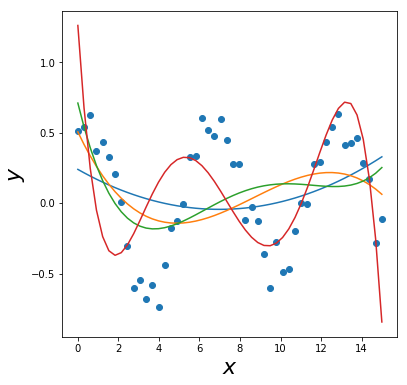

In [65]:
error = []
plt.figure(figsize = (6,6))
plt.scatter(x,y)
for i in range(2,6):
    b0 = np.random.random((i + 1,))
    res = opt.minimize(obj_lasso, b0, args=(x,y, i, .01))
    yhat = np.array([x**j for j in range(i + 1)]).T.dot(res.x)
    error.append(np.sum(y - yhat)**2)
    plt.plot(x, yhat, label = "Orden %s" % i)
#plt.legend(bbox_to_anchor=[1, .92])
plt.xlabel("$x$", fontsize = 22)
plt.ylabel("$y$", fontsize = 22)
plt.show()